# Import 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_error

# Read .csv file

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Function for Scatter Plot:

In [5]:
def getscatter(col):
    return plt.scatter(df[col],df.price)

# Function For Labelled Data For Each Encoded Column:

In [6]:
Label_Encoded_Data = {}

def get_Labelled_Date(col):
    Label_Encoded_Data[col] = dict(zip(df[col].unique(), range(len(df[col].unique()))))

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# EDA and Feature Engineering`

In [8]:
df.CarName = df.CarName.apply(lambda x:x.split()[0])

In [9]:
get_Labelled_Date("CarName")
df.CarName = df.CarName.replace(df.CarName.unique() , range(len(df.CarName.unique())))

In [10]:
get_Labelled_Date("fueltype")
df.fueltype = df.fueltype.replace(df.fueltype.unique(), range(len(df.fueltype.unique())))

In [11]:
get_Labelled_Date("aspiration")
df['aspiration'] = df['aspiration'].replace(df['aspiration'].unique(), range(len(df.aspiration.unique())))

In [12]:
Label_Encoded_Data["doornumber"] = dict(zip(df["doornumber"].unique(), [2,4]))
df["doornumber"] = df["doornumber"].replace(Label_Encoded_Data["doornumber"])

In [13]:
get_Labelled_Date("carbody")
df["carbody"] = df["carbody"].replace(df["carbody"].unique(), range(len(df["carbody"].unique())))

In [14]:
get_Labelled_Date("drivewheel")
df["drivewheel"] =df["drivewheel"].replace(df["drivewheel"].unique(), range(len(df["drivewheel"].unique())))

In [15]:
Label_Encoded_Data["enginelocation"] = dict(zip(df["enginelocation"].unique(), [0,1]))
df["enginelocation"] = df["enginelocation"].replace(Label_Encoded_Data["enginelocation"])

In [16]:
get_Labelled_Date("enginetype")
df["enginetype"] = df["enginetype"].replace(df["enginetype"].unique(), range(len(df["enginetype"].unique())))

In [17]:
df["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [18]:
Label_Encoded_Data["cylindernumber"] = dict(zip(df["cylindernumber"].unique(), [4,6,5,3,12,2,8]))
df["cylindernumber"] = df["cylindernumber"].replace(Label_Encoded_Data["cylindernumber"])

In [19]:
get_Labelled_Date("fuelsystem")
df["fuelsystem"] = df["fuelsystem"].replace(df["fuelsystem"].unique(), range(len(df["fuelsystem"].unique())))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

<AxesSubplot:>

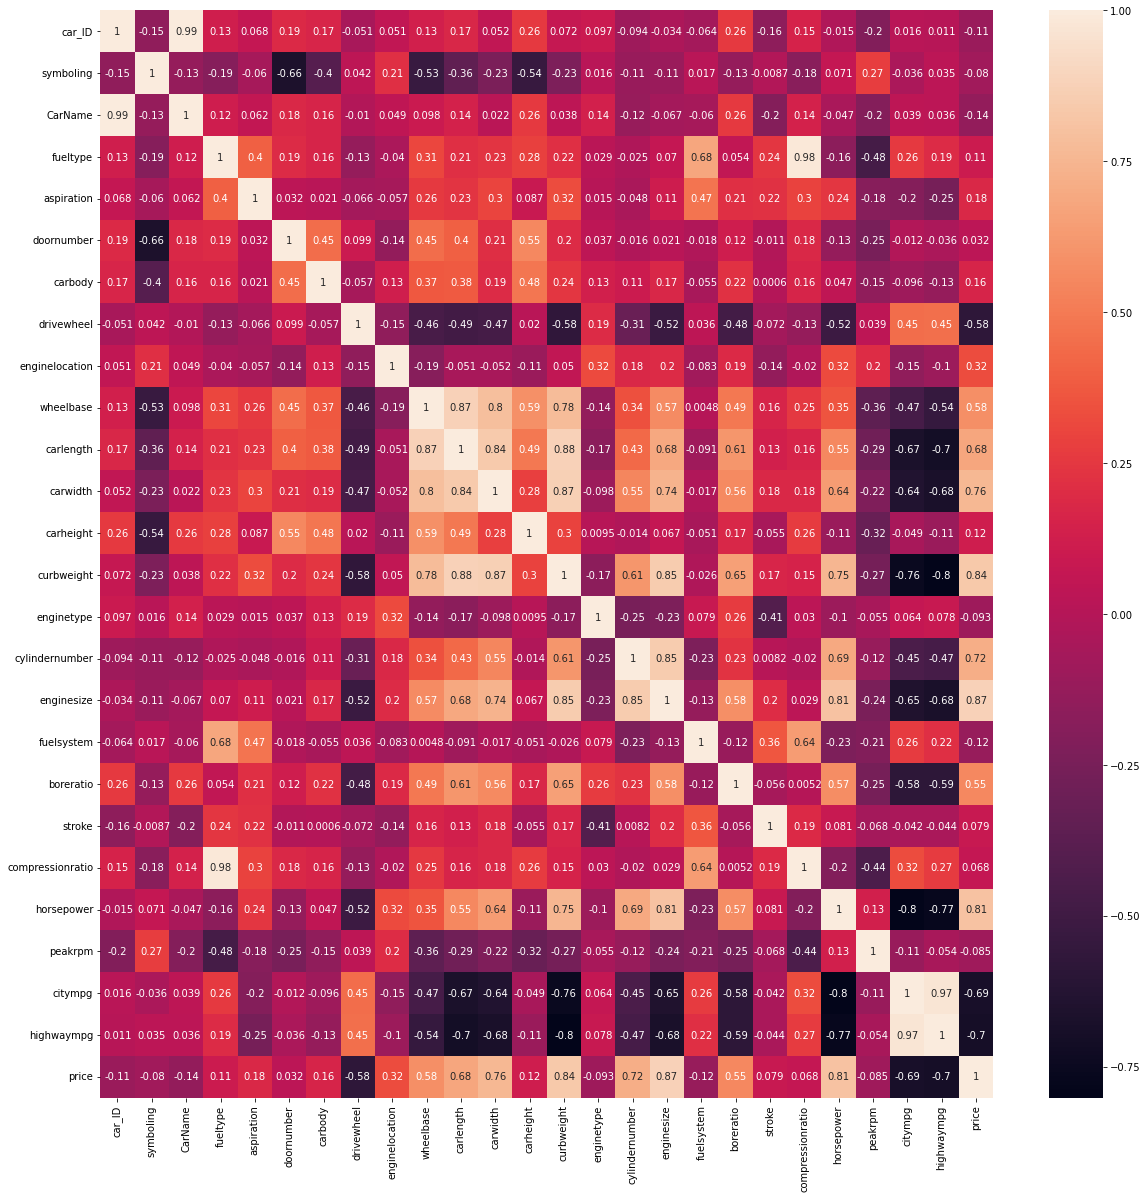

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot= True)

# split dataframe

In [22]:
x,y = df.drop("price",axis = 1),df.price

# Model Builting and Trainng

In [23]:
x_train,x_test,y_train,y_test  =  train_test_split(x.values,y,test_size=0.2,random_state=2023)

In [24]:
LR_Model = LinearRegression()
LR_Model.fit(x_train,y_train)

LinearRegression()

# Prediction:

In [25]:
y_pred_train = LR_Model.predict(x_train)
y_pred_test = LR_Model.predict(x_test)

# Model_Evaluation:

In [26]:
r2_train = r2_score(y_train,y_pred_train)
print(f"Traning r2_Score : {r2_train} ")

Traning r2_Score : 0.9110353318391378 


In [27]:
r2_test = r2_score(y_test,y_pred_test)
print(f"Testing r2_Score : {r2_test} ")

Testing r2_Score : 0.8086212432078478 


# Creating Pickel file

In [28]:
import pickle,json

In [29]:
Label_Encoded_Data["columns"] = list(x.columns)

In [30]:
with open("CarPrice_Prediction.pkl", "wb") as f:
    pickle.dump(LR_Model,f)

In [31]:
with open("Label_Encoded_Data.json","w") as f:
    json.dump(Label_Encoded_Data,f)